# 1. Package importation

In [1]:
#  packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import string

# Data Augmentation
import random
import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

# vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# classifiers
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.utils.multiclass import unique_labels

# pipeline
from sklearn.pipeline import Pipeline

# train and test split
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


# 2. Data Loading

In [3]:
# Chargement du fichier CSV depuis Google Drive
train_dataset = pd.read_csv("/content/drive/MyDrive/training_data.csv")
test_dataset = pd.read_csv("/content/drive/MyDrive/unlabelled_test_data.csv")


# View of the Data






In [4]:
train_dataset

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1
...,...,...,...
4795,4795,"C'est pourquoi, il décida de remplacer les hab...",B2
4796,4796,Il avait une de ces pâleurs splendides qui don...,C1
4797,4797,"Et le premier samedi de chaque mois, venez ren...",A2
4798,4798,Les coûts liés à la journalisation n'étant pas...,C2


# 3. Splitting the training data into a train and test set

In [5]:
x = train_dataset['sentence']  # X contains the features we want to analyze
y = train_dataset['difficulty']  # y is the labels we want
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)


# 4.  Approaches to create and evaluate models (without data cleaning)


In [6]:
# set a Tfidf vectorizer
tfidf_vector = TfidfVectorizer(ngram_range=(1, 1))

In [7]:
# method to create a pipeline using Tfidf vectoriser and a classifier
def pipeline(classifier):
    pipeline = Pipeline([('vectorizer', tfidf_vector), ('classifier', classifier)])
    return pipeline


In [8]:
# method to fit the models on the training set and make predictions
def fit_and_predict(pipeline):
  pipeline.fit(x_train, y_train)
  y_pred = pipeline.predict(x_test)
  return y_pred


In [9]:
def evaluation(y_test, y_pred):

    # compute and print the evaluation scores on the test set
    print('Accuracy = {:.4f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision = {:.4f}'.format(precision_score(y_test, y_pred, average='weighted')))
    print('Recall = {:.4f}'.format(recall_score(y_test, y_pred, average='weighted')))
    print('F1-score = {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))

    # define the labels, plot and display the confusion matrix
    labels = list(unique_labels(y_test, y_pred))
    cfm = confusion_matrix(y_test, y_pred, labels = labels)
    fig, ax = plt.subplots(figsize=(6,6))
    plt.title('Confusion matrix of the model')
    sns.heatmap(cfm, annot=True, fmt='4g', cmap='PuRd', xticklabels=labels, yticklabels=labels)
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()

In [10]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


# 5. Logistic Regression

Accuracy = 0.4667
Precision = 0.4656
Recall = 0.4667
F1-score = 0.4640


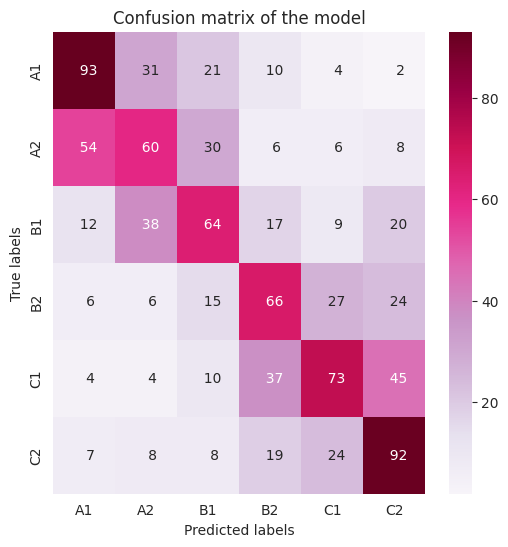

In [11]:
# define classifier
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=300)

# create pipeline
pipeline_lr = pipeline(lr)

# fit model on training set and make predictions
y_pred_lr = fit_and_predict(pipeline_lr)

# evaluate the model
lr_evaluation = evaluation(y_test, y_pred_lr)

# 6. k-Nearest Neighbors (kNN)

Accuracy = 0.3146
Precision = 0.3721
Recall = 0.3146
F1-score = 0.2947


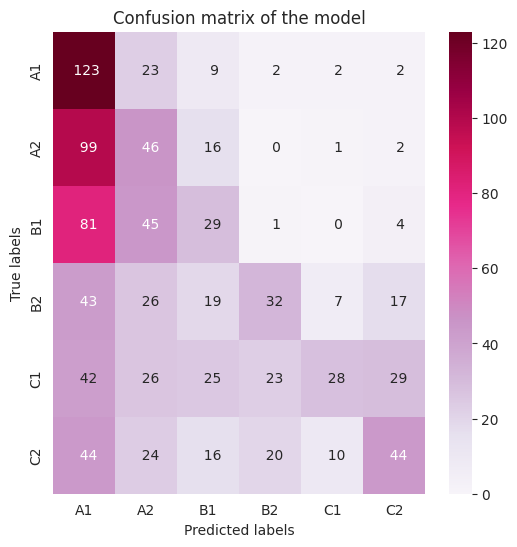

In [ ]:
# define classifier
knn = KNeighborsClassifier()

# create pipeline
pipeline_knn = pipeline(knn)

# fit model on training set and make predictions
y_pred_knn = fit_and_predict(pipeline_knn)

# evaluate the model
knn_evaluation = evaluation(y_test, y_pred_knn)

#7. Decision Tree

Accuracy = 0.2958
Precision = 0.2897
Recall = 0.2958
F1-score = 0.2907


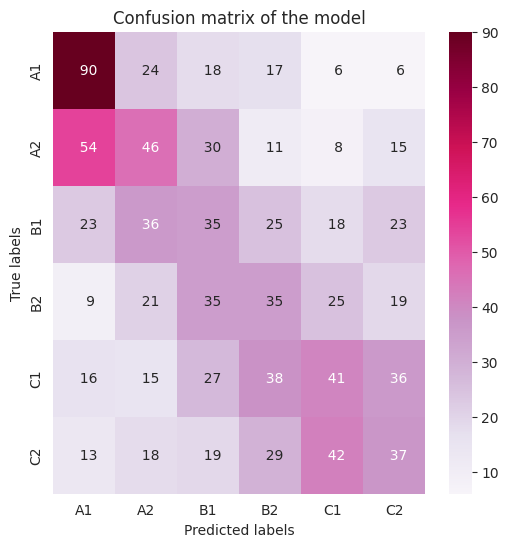

In [ ]:
# define classifier
tree = DecisionTreeClassifier()

# create pipeline
pipeline_tree = pipeline(tree)

# fit model on training set and make predictions
y_pred_tree = fit_and_predict(pipeline_tree)

# evaluate the model
tree_evaluation = evaluation(y_test, y_pred_tree)

# 8. Random Forest



Accuracy = 0.3708
Precision = 0.3857
Recall = 0.3708
F1-score = 0.3537


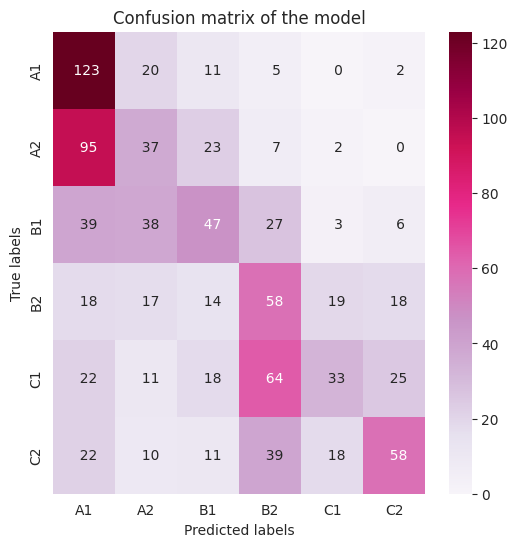

In [ ]:
# define classifier
rf = RandomForestClassifier()

# create pipeline
pipeline_rf = pipeline(rf)

# fit model on training set and make predictions
y_pred_rf= fit_and_predict(pipeline_rf)

# evaluate the model
rf_evaluation = evaluation(y_test, y_pred_rf)